# EDA for the Emotion Image Dataset

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# Constants
DATASET_DIR = "../../data/raw/fer2013/train"
EXPECTED_SIZE = (48, 48)

#Merging Classes as we discuss
MERGE_MAP = {
    "angry": "stressed",
    "disgust": "stressed",
    "happy": "happy",
    "sad": "sad",
    "neutral": "neutral"
}

# Storage - for storing attributes
class_counts = {}
brightness_vals = []
small_images = []
invalid_modes = []
corrupted_files = []
sample_images = []



## Scan all image files

In [10]:
from tqdm.notebook import tqdm

sample_counts = {k: 0 for k in set(MERGE_MAP.values())}

print("Scanning dataset... 🔍")
for original_class in tqdm(os.listdir(DATASET_DIR), desc="Classes"):
    class_path = os.path.join(DATASET_DIR, original_class)
    if not os.path.isdir(class_path):
        continue

    merged_class = MERGE_MAP.get(original_class.lower())
    if merged_class is None:
        continue

    file_list = os.listdir(class_path)
    class_counts.setdefault(merged_class, 0)
    class_counts[merged_class] += len(file_list)

    for i, file_name in enumerate(tqdm(file_list, desc=f"{original_class}", leave=False)):
        fpath = os.path.join(class_path, file_name)
        try:
            with Image.open(fpath) as img:
                img = img.convert("L")  # Grayscale
                img_resized = img.resize(EXPECTED_SIZE)
                brightness_vals.append(np.mean(img_resized))

                # Collect samples for visualizations later
                if sample_counts[merged_class] < 3:
                    sample_images.append((merged_class, img_resized))
                    sample_counts[merged_class] += 1

                # Flag small images
                if img.size[0] < 32 or img.size[1] < 32:
                    small_images.append(fpath)

                #Flag images with diffrent color modes
                if img.mode not in ["L", "RGB"]:
                    invalid_modes.append((fpath, img.mode))

        except Exception as e:
            corrupted_files.append((fpath, str(e)))
print("Dataset Scanning Success.. ✅")

Scanning dataset... 🔍


Classes:   0%|          | 0/7 [00:00<?, ?it/s]

angry:   0%|          | 0/3995 [00:00<?, ?it/s]

disgust:   0%|          | 0/436 [00:00<?, ?it/s]

happy:   0%|          | 0/7215 [00:00<?, ?it/s]

neutral:   0%|          | 0/4965 [00:00<?, ?it/s]

sad:   0%|          | 0/4830 [00:00<?, ?it/s]

Dataset Scanning Success.. ✅


## Plots

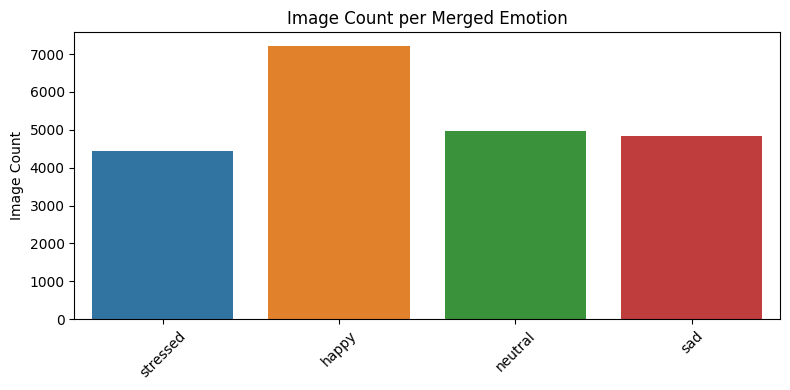

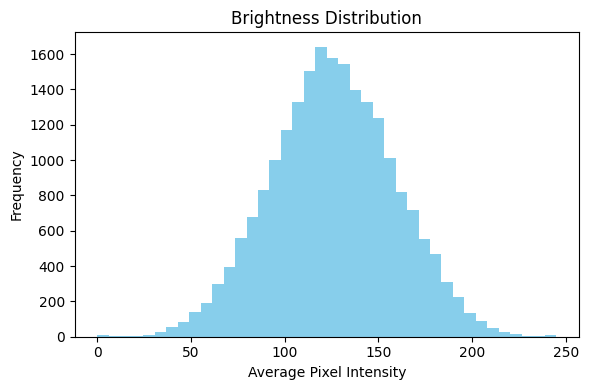

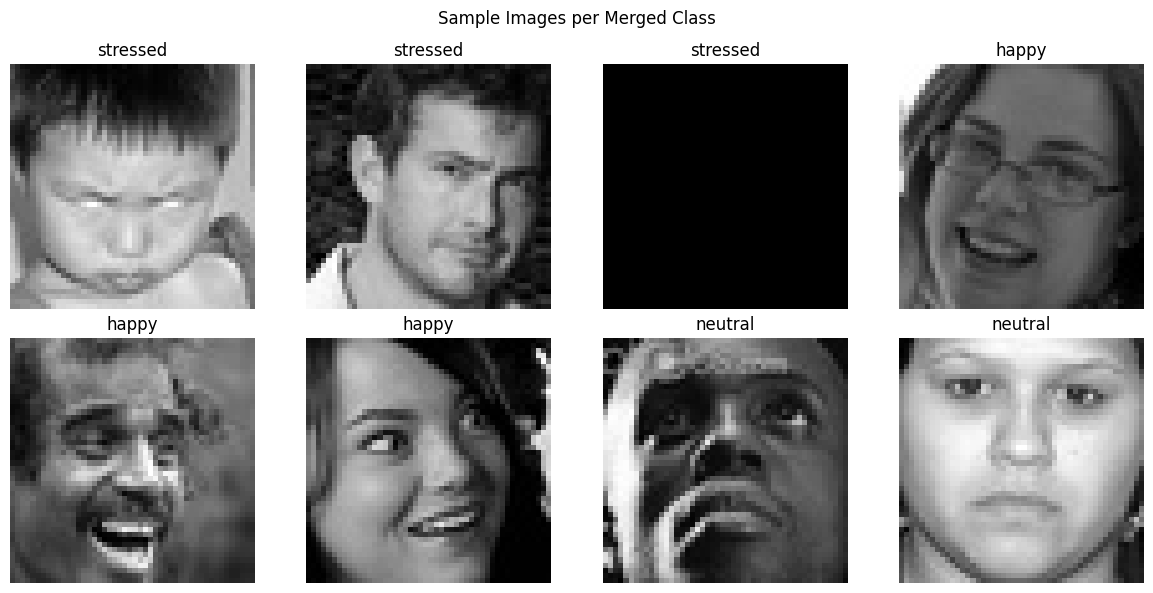

In [11]:
# Class distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Image Count per Merged Emotion")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Brightness histogram
plt.figure(figsize=(6, 4))
plt.hist(brightness_vals, bins=40, color='skyblue')
plt.title("Brightness Distribution")
plt.xlabel("Average Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Sample images
plt.figure(figsize=(12, 6))
for i, (label, img) in enumerate(sample_images[:8]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.suptitle("Sample Images per Merged Class")
plt.tight_layout()
plt.show()


## Summary

In [7]:
print("\n[Summary Report]")
print(f"Total classes: {len(class_counts)}")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")

print(f"\nCorrupted files: {len(corrupted_files)}")
if corrupted_files:
    print("  Example:", corrupted_files[0])

print(f"Images smaller than 32x32: {len(small_images)}")
print(f"Non-standard modes: {len(invalid_modes)}")



[Summary Report]
Total classes: 4
  stressed: 4431 images
  happy: 7215 images
  neutral: 4965 images
  sad: 4830 images

Corrupted files: 0
Images smaller than 32x32: 0
Non-standard modes: 0
